# Random Forest Ensemble

Try to create a model with Random Forest ensemble.  Consider PCA, investigate.

Convert 'sex' column to booleans with get_dummies.  Split into testing and training sets.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

df = pd.read_csv('abalone.data')
df.columns = ['sex','length','diameter','height','whole weight','shucked weight','viscera weight','shell weight','rings']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 9 columns):
sex               4176 non-null object
length            4176 non-null float64
diameter          4176 non-null float64
height            4176 non-null float64
whole weight      4176 non-null float64
shucked weight    4176 non-null float64
viscera weight    4176 non-null float64
shell weight      4176 non-null float64
rings             4176 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.7+ KB


In [2]:
df = pd.get_dummies(df, columns = ['sex'])
df.head()

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings,sex_F,sex_I,sex_M
0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0
4,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,0,1,0


In [3]:
y = df['rings']
X = df.drop('rings', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [4]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=30, oob_score=True).fit(X_train,y_train)

model.score(X_test,y_test)

0.25119617224880381

In [8]:
#Generate a model given parameters

def forest(X, y, tsize, numtrees, text=True):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=tsize, random_state=0)
    model = RandomForestClassifier(n_estimators=numtrees, oob_score=False).fit(X_train,y_train)
    score = model.score(X_test,y_test)
    if text == True:
        print('With testing proportion ' + str(tsize) + ' and forest size of ' + str(numtrees) +' score = '+ str(score))
    return score

In [6]:
forest(X,y,.50,50)

With testing proportion 0.5 and forest size of 50 score = 0.253352490421


0.25335249042145591

# Examine Variations

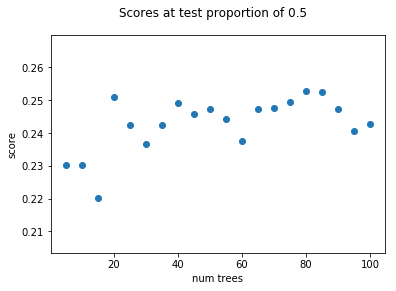

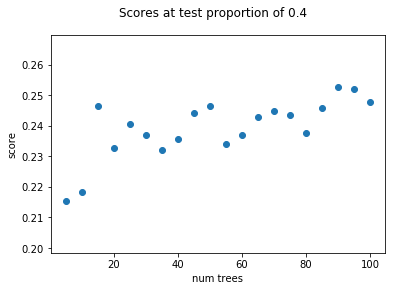

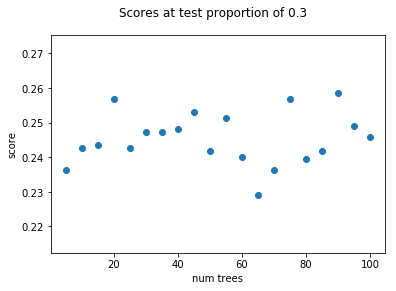

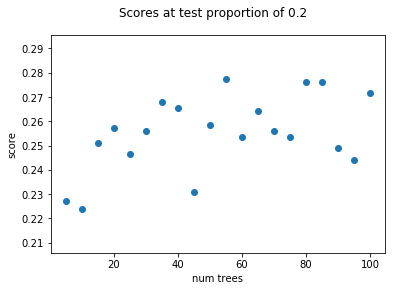

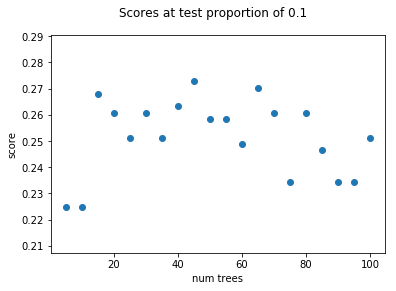

In [9]:
#explore possible variations

#for the loop
temp_scores = []

trees = list(range(5,105,5))
test_sizes = [.5,.4,.3,.2,.1]

#for each proportion of testing size, test a set of forest sizes, plot it
for test_size in test_sizes:
    for tree_num in trees:
        score = forest(X, y, test_size, tree_num, text = False)
        temp_scores.append(score)
    title = 'Scores at test proportion of ' + str(test_size)
    plt.scatter(x=trees, y=temp_scores)
    plt.suptitle(title)
    plt.xlabel('num trees')
    plt.ylabel('score')
    plt.show()
    temp_scores = []

In [10]:
#Again, but put it all in a dataframe

all_scores = []

trees = list(range(5,105,5))
test_sizes = [.5,.4,.3,.2,.1]

for test_size in test_sizes:
    for tree_num in trees:
        score = forest(X, y, test_size, tree_num, text = False)
        all_scores.append([test_size, tree_num, score])

all_scoresDF = pd.DataFrame(all_scores, columns = ['testing size','num trees', 'score'])

#is there a test proportion with consistently better scores?

tprop = all_scoresDF['testing size'].unique()

for size in tprop:
    boo = all_scoresDF['testing size'] == size
    temp = all_scoresDF[boo]
    mean = temp['score'].mean()
    print('Testing proportion of ' + str(size) + ' had a mean score of ' + str(mean))
    print('\n')

Testing proportion of 0.5 had a mean score of 0.24676724137931036


Testing proportion of 0.4 had a mean score of 0.2421903052064632


Testing proportion of 0.3 had a mean score of 0.24521149241819637


Testing proportion of 0.2 had a mean score of 0.2557416267942584


Testing proportion of 0.1 had a mean score of 0.24976076555023924


